# Advanced Soybean Agricultural Dataset - Sammartino Pedro
### Coderhouse - Data Science - Entrega Parte I 

El presente trabajo usa la base de datos "Advanced Soybean Agricultural Dataset" (https://www.kaggle.com/datasets/wisam1985/advanced-soybean-agricultural-dataset-2025), recolectado por profesionales de la Univerisdad de Tikrit, Irak. El mismo contiene distintas combinaciones de  genotipos, condiciones hídricas y tratamientos que impactaran en distinta formas a múltiples variables como peso de granos, clorofila de hojas, proteína de granos, numero de vainas (pods), rendimiento, entre otras.
El objetivo del trabajo es explorar la influencia de las distintos parámetros sobre distintas variables, principalmente rendimiento, sus componentes y componentes de calidad de granos, entre otros factores. 

Se intentaran responder preguntas como: 
1.	¿Qué combinación de tratamiento y genotipo maximiza el rendimiento?,
2.	¿Cómo afecta el estrés hídrico a la composición proteica de la soja? 
3.	¿Existe relación entre cantidad de clorofila y contenido de proteina en grano o afecta mas al rendimiento? 
4.	¿Que componente de rendimiento explica mejor el Seeds Yield? Numero de Pods, Numero de grano por pods o peso de los granos? 
5.	El Leaf Area Index a influido en el rendimiento?

H1: Existe una combinación específica de genotipo, nivel de estrés hídrico y tratamiento con ácido salicílico que maximiza el rendimiento (Seed Yield per Unit Area).

H2: El aumento del estrés hídrico reduce significativamente el contenido de proteína en el grano (Protein Content y/o Protein Percentage).

H3: Los valores más altos de clorofila en hoja (Chlorophyll A663 y Chlorophyll b649) están positivamente correlacionados con el contenido de proteína del grano y/o el rendimiento, siendo su efecto mayor sobre una de estas variables.

H4: Entre los tres componentes del rendimiento (número de Vainas Number of Pods, número de Semillas por Vaina, mnumber of Seeds per Pod, y Peso de 300 Semillas), uno explica significativamente mejor el Seed Yield per Unit Area.

H5: Un mayor Leaf Area Index (LAI) está asociado con un mayor rendimiento de semilla (Seed Yield per Unit Area).




### Importacion de librerias y descripcion del dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importar dataset
df = pd.read_csv("https://raw.githubusercontent.com/sammartinopedro/DataScience/refs/heads/main/Advanced%20Soybean%20Agricultural%20Dataset.csv")
#Ver info


### Ver estructura del dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Plant Height (PH)                        55450 non-null  float64
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  float64
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)                55450

In [4]:
df.describe()

,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
count,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000
mean,49.959392,144.938979,114.533886,0.477543,0.673621,3.937670,2.399096,36.042123,35.349129,0.072132,4388.525773,2.020076,0.507610
std,3.052315,20.015994,48.925533,0.236294,0.084515,2.846317,1.187323,2.417205,4.999200,0.022278,1251.490529,0.245889,0.287548
min,40.400000,75.000000,32.000000,0.161000,0.434000,1.000000,1.100000,31.100000,26.400000,0.020000,2127.500000,1.400000,0.120000
25%,49.200000,131.400000,80.000000,0.295000,0.632250,1.500000,1.300000,33.600000,32.200000,0.060000,3352.200000,1.850000,0.330000
50%,50.300000,147.000000,102.000000,0.466000,0.677000,2.300000,2.200000,36.600000,34.500000,0.080000,4300.700000,2.050000,0.480000
75%,52.000000,158.000000,133.000000,0.612000,0.722000,6.700000,3.100000,38.000000,37.200000,0.090000,5233.500000,2.200000,0.600000
max,55.700000,218.000000,236.000000,1.115000,0.875000,10.200000,7.800000,39.900000,53.900000,0.100000,7841.500000,2.600000,1.800000


In [5]:
df.isnull()

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55445,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55447,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.nunique()


Parameters                                  35
Random                                       3
Plant Height (PH)                           56
Number of Pods (NP)                         72
Biological Weight (BW)                      82
Sugars (Su)                                 91
Relative Water Content in Leaves (RWCL)     83
ChlorophyllA663                             50
Chlorophyllb649                             28
Protein Percentage (PPE)                    44
Weight of 300 Seeds (W3S)                   69
Leaf Area Index (LAI)                        9
Seed Yield per Unit Area (SYUA)            107
Number of Seeds per Pod (NSP)               21
Protein Content (PCO)                       34
dtype: int64

In [7]:
df["Parameters"].value_counts()


Parameters
C2S1G3    3081
C1S3G5    1541
C2S1G6    1541
C2S1G5    1541
C2S1G4    1541
C2S1G2    1541
C1S3G2    1541
C2S1G1    1541
C1S3G4    1541
C1S3G3    1541
C1S1G5    1540
C2S3G4    1540
C2S3G1    1540
C2S2G4    1540
C1S1G6    1540
C1S1G2    1540
C1S1G1    1540
C2S2G6    1540
C1S2G6    1540
C2S2G5    1540
C2S2G1    1540
C2S3G3    1540
C1S3G1    1540
C1S1G4    1540
C2S3G2    1540
C1S2G1    1540
C1S2G4    1540
C1S3G6    1540
C1S1G3    1540
C2S2G2    1540
C1S2G3    1540
C2S3G5    1540
C2S3G6    1540
C1S2G2    1540
C1S2G5    1540
Name: count, dtype: int64

# Limpieza del dataframe

No se detectaron valores nulos. Igualmente se detectaron dos inconsistencias:

En la descripcion de la base de datos tomada, nombra al parametro

C como salicylic acid, con dos niveles (250 mg and 450 mg) y uno tercero de control.
S: con dos niveles de estres hidirco> 5% of field capacity y 70% of field capacity.

Sin embargo el dataframe esta invertido, por lo que se supone que S es nivel de salicyclic acid y C de condicion hidrica.

La segunda inconsistencia es que el parametro C2S1G3 tiene el dobre de registros y no existe el parametro C2S2G3. Es probable que se hayan mezclado ambos parametros bajo C2S1G3, por lo que se decide hacer un nuevo dataframe eliminando el G3 y transformando los tres parametros en columnas nuevas.



In [8]:
df["C"] = df["Parameters"].str.extract(r'C(\d)')  # Condición hídrica
df["S"] = df["Parameters"].str.extract(r'S(\d)')  # Salicylic acid
df["G"] = df["Parameters"].str.extract(r'G(\d)')  # Genotipo


df = df[~df["G"].str.contains("3")].copy()

df.head(20)

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO),C,S,G
0,C1S1G5,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82,1,1,5
1,C2S3G4,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13,2,3,4
2,C2S1G6,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15,2,1,6
3,C1S1G1,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14,1,1,1
4,C1S2G6,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60,1,2,6
5,C2S2G6,R2,52.0,136.0,62.0,0.265,0.633,4.3,1.2,33.5,44.4,0.07,3985.2,2.06,0.30,2,2,6
6,C1S1G6,R2,44.2,147.3,115.0,0.463,0.762,1.1,2.1,37.3,31.9,0.10,3029.3,1.60,0.48,1,1,6
7,C1S3G5,R1,52.0,158.3,205.0,0.531,0.677,1.2,3.2,33.3,32.6,0.07,6645.7,1.87,0.40,1,3,5
8,C2S2G4,R2,49.3,155.0,68.0,0.298,0.672,7.2,1.2,31.1,38.1,0.06,3104.6,1.80,0.18,2,2,4
9,C2S3G1,R1,45.8,151.0,87.0,0.323,0.717,1.9,2.5,37.6,37.5,0.03,4256.8,2.20,0.73,2,3,1


## Graficos

### **Boxplot Hipotesis 1** > Interaccion genotipo, acido salicilico y condicion hidrica que maximiza el rendimiento

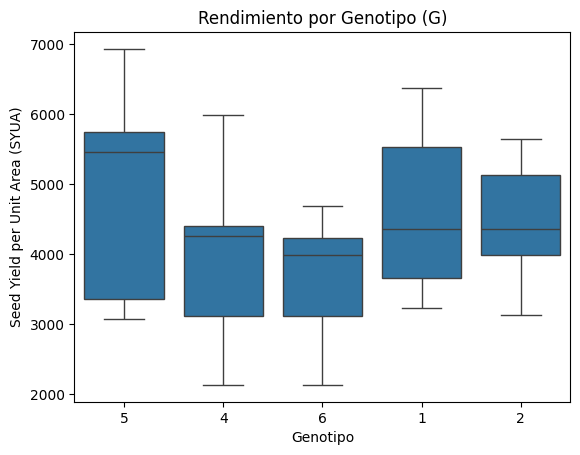

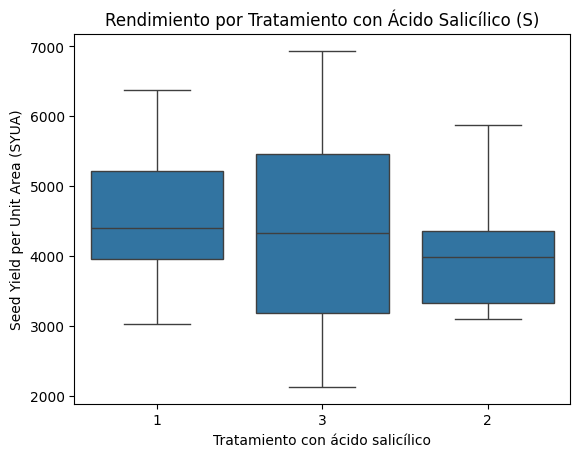

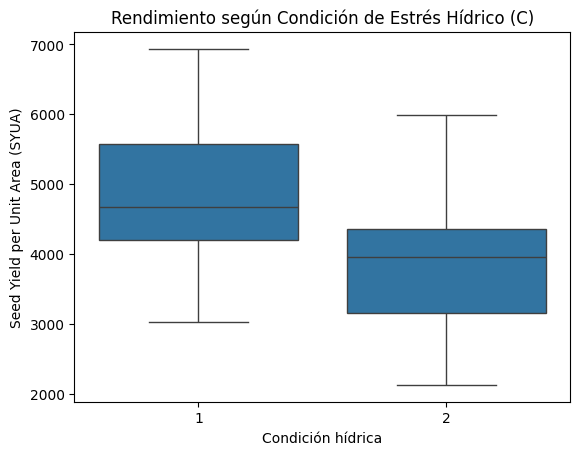

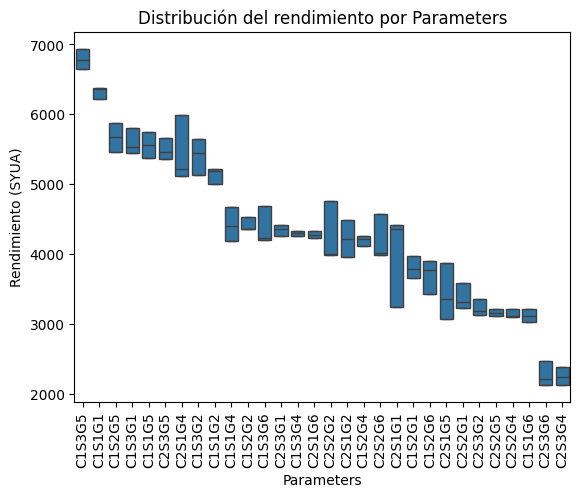

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

#Boxplot Genotipo
sns.boxplot(data=df, x="G", y="Seed Yield per Unit Area (SYUA)")
plt.title("Rendimiento por Genotipo (G)")
plt.xlabel("Genotipo")
plt.ylabel("Seed Yield per Unit Area (SYUA)")
plt.show()

#Boxplot Acido Salicilico
sns.boxplot(data=df, x="S", y="Seed Yield per Unit Area (SYUA)")
plt.title("Rendimiento por Tratamiento con Ácido Salicílico (S)")
plt.xlabel("Tratamiento con ácido salicílico")
plt.ylabel("Seed Yield per Unit Area (SYUA)")
plt.show()

#Boxplot Condicion de agua
sns.boxplot(data=df, x="C", y="Seed Yield per Unit Area (SYUA)")
plt.title("Rendimiento según Condición de Estrés Hídrico (C)")
plt.xlabel("Condición hídrica")
plt.ylabel("Seed Yield per Unit Area (SYUA)")
plt.show()


#Boxplot de Parameters (variables G, C y S)

# Boxplot
sns.boxplot(data=df, x="Parameters", y="Seed Yield per Unit Area (SYUA)", order=order)
# Ordenar por la media
order = df.groupby("Parameters")["Seed Yield per Unit Area (SYUA)"].mean().sort_values(ascending=False).index
# Títulos y ejes
plt.title("Distribución del rendimiento por Parameters")
plt.xticks(rotation=90)
plt.xlabel("Parameters")
plt.ylabel("Rendimiento (SYUA)")
plt.show()



Se interpreta que el Parametro C1S3G4 maximiza el rendimiento, seguido por C1S1G1, en comparacion a los otros parametros

### **Scatter point Hipotesis 3** > Relación entre clorofila, Protein Content y Rendimiento

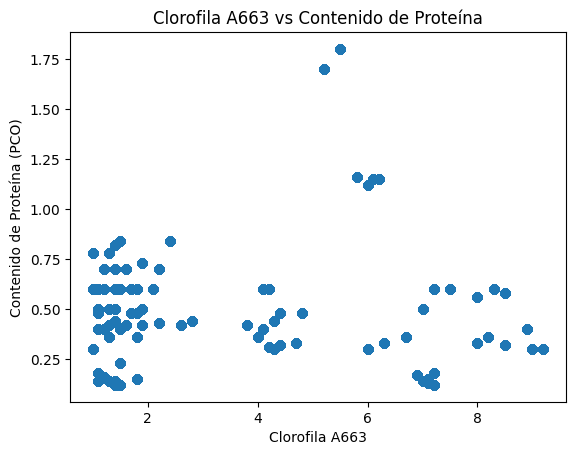

Correlación: 0.02 | R² = 0.00


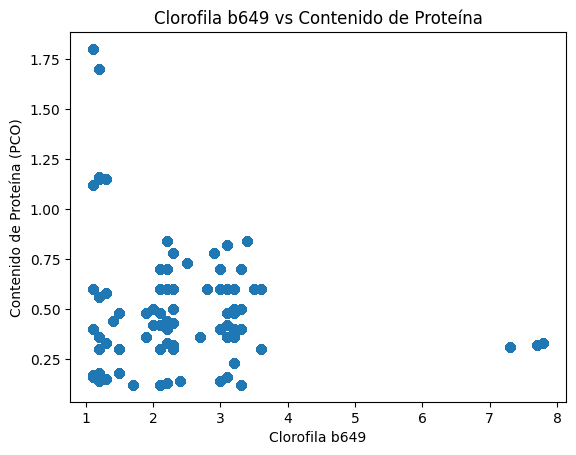

Correlación: -0.14 | R² = 0.02


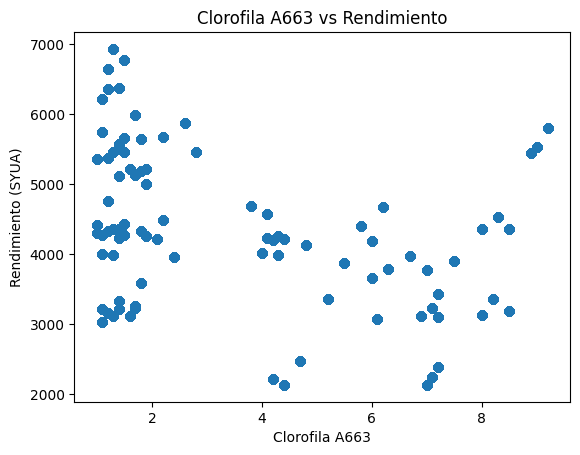

Correlación: -0.35 | R² = 0.13


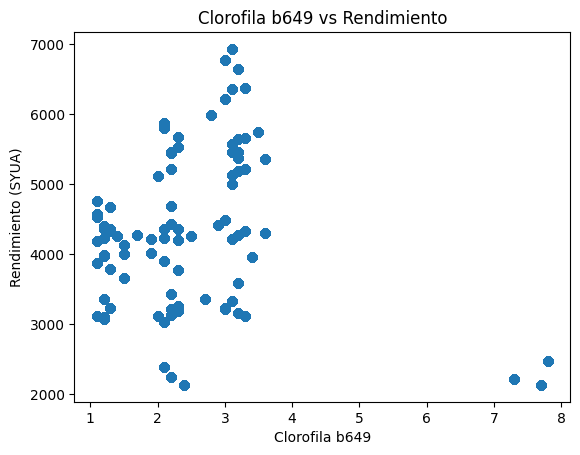

Correlación: -0.05 | R² = 0.00


In [30]:
# Relación entre ChlorophyllA663 y Protein Content (PCO)
plt.scatter(df["ChlorophyllA663"], df["Protein Content (PCO)"])
plt.title("Clorofila A663 vs Contenido de Proteína")
plt.xlabel("Clorofila A663")
plt.ylabel("Contenido de Proteína (PCO)")
plt.show()
corr = np.corrcoef(df["ChlorophyllA663"], df["Protein Content (PCO)"])[0, 1]
print(f"Correlación: {corr:.2f} | R² = {corr**2:.2f}")

# Relación entre Chlorophyllb649 y Protein Content (PCO)
plt.scatter(df["Chlorophyllb649"], df["Protein Content (PCO)"])
plt.title("Clorofila b649 vs Contenido de Proteína")
plt.xlabel("Clorofila b649")
plt.ylabel("Contenido de Proteína (PCO)")
plt.show()
corr = np.corrcoef(df["Chlorophyllb649"], df["Protein Content (PCO)"])[0, 1]
print(f"Correlación: {corr:.2f} | R² = {corr**2:.2f}")

# Relación entre ChlorophyllA663 y rendimiento
plt.scatter(df["ChlorophyllA663"], df["Seed Yield per Unit Area (SYUA)"])
plt.title("Clorofila A663 vs Rendimiento")
plt.xlabel("Clorofila A663")
plt.ylabel("Rendimiento (SYUA)")
plt.show()
corr = np.corrcoef(df["ChlorophyllA663"], df["Seed Yield per Unit Area (SYUA)"])[0, 1]
print(f"Correlación: {corr:.2f} | R² = {corr**2:.2f}")

# Relación entre Chlorophyllb649 y rendimiento
plt.scatter(df["Chlorophyllb649"], df["Seed Yield per Unit Area (SYUA)"])
plt.title("Clorofila b649 vs Rendimiento")
plt.xlabel("Clorofila b649")
plt.ylabel("Rendimiento (SYUA)")
plt.show()
corr = np.corrcoef(df["Chlorophyllb649"], df["Seed Yield per Unit Area (SYUA)"])[0, 1]
print(f"Correlación: {corr:.2f} | R² = {corr**2:.2f}")

No se muestra una correlacion entre los valores de clorofila y la proteina. Se pudo mostrar en mayor medida, aunque no fuertemente, una correlacion negativa de clorofila A663 con rendimiento, que puede deberse a una dilucion en la cantidad de clorofila a mayor cantidad de granos producidos.

### **Scatter point Hipotesis 4** > Componentes de rinde y rendimiento

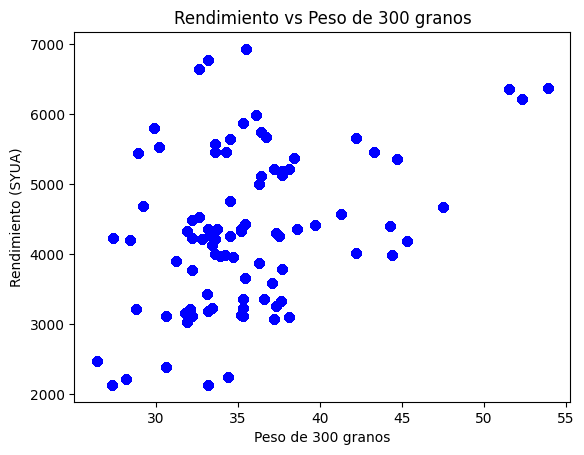

Correlación: 0.39 | R² = 0.15


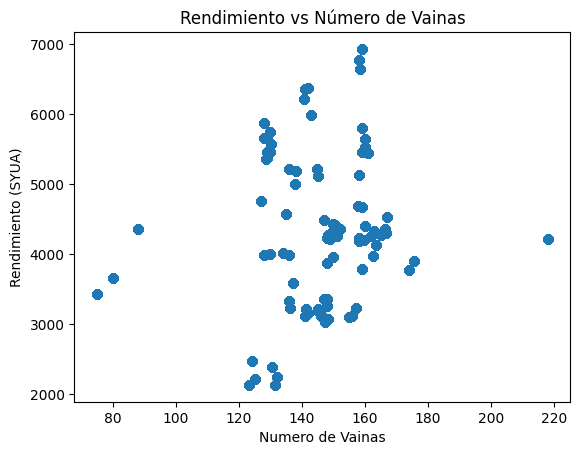

Correlación: 0.12 | R² = 0.01


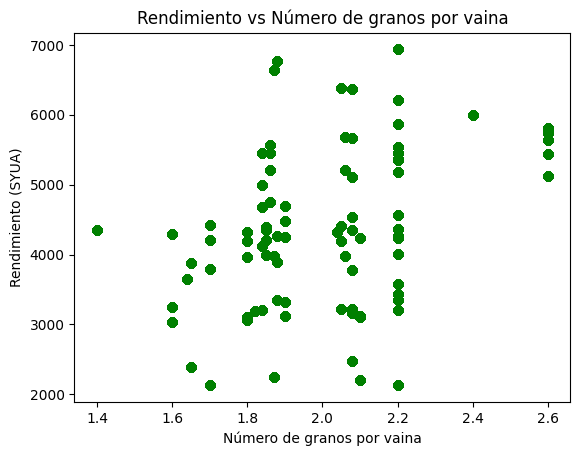

R² = 0.11
Correlación: 0.33 | R² = 0.11


In [31]:
#Relación entre rendimiento y peso de 300 granos
plt.scatter(df["Weight of 300 Seeds (W3S)"], df["Seed Yield per Unit Area (SYUA)"], color='blue')
plt.title("Rendimiento vs Peso de 300 granos")
plt.xlabel("Peso de 300 granos")
plt.ylabel("Rendimiento (SYUA)")
plt.show()
corr = np.corrcoef(df["Weight of 300 Seeds (W3S)"], df["Seed Yield per Unit Area (SYUA)"])[0,1]
print(f"Correlación: {corr:.2f} | R² = {corr**2:.2f}")

#Relación entre rendimiento y número de vainas
plt.scatter(df["Number of Pods (NP)"], df["Seed Yield per Unit Area (SYUA)"], )
plt.title("Rendimiento vs Número de Vainas")
plt.xlabel("Numero de Vainas")
plt.ylabel("Rendimiento (SYUA)")
plt.show()

corr = np.corrcoef(df["Number of Pods (NP)"], df["Seed Yield per Unit Area (SYUA)"])[0,1]
print(f"Correlación: {corr:.2f} | R² = {corr**2:.2f}")


#Relación entre rendimiento y numero de granos por vaina
plt.scatter(df["Number of Seeds per Pod (NSP)"],df["Seed Yield per Unit Area (SYUA)"], color='green')
plt.title("Rendimiento vs Número de granos por vaina")
plt.xlabel("Número de granos por vaina")
plt.ylabel("Rendimiento (SYUA)")
plt.show()
print(f"R² = {np.corrcoef(df['Number of Seeds per Pod (NSP)'], df['Seed Yield per Unit Area (SYUA)'])[0,1]**2:.2f}")

corr = np.corrcoef(df["Number of Seeds per Pod (NSP)"], df["Seed Yield per Unit Area (SYUA)"])[0,1]
print(f"Correlación: {corr:.2f} | R² = {corr**2:.2f}")


Comparando los componentes de rendimiento el peso de granos fue el que mejor explico el rendimiento. Sin embargo se muestra, tanto en este componente como en el resto, una correlacion muy baja con respecto a rendimiento, no pudiendo explicar suficientemente el mismo.